**Import** **data**

In [ ]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Import csv file
dat = pd.read_csv('/content/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
dat

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


**Clean Data**

In [ ]:
# Clean data so that there are not duplicate sports categories
dat['clean_sport'] = dat['Sport'].str.lower()
dat['clean_sport'] = dat['clean_sport'].str.replace('american football / baseball', 'american football')
dat['clean_sport'] = dat['clean_sport'].str.replace('nfl', 'american football')
dat['clean_sport'] = dat['clean_sport'].str.replace('auto racing (nascar)', 'auto racing', regex=False)
dat['clean_sport'] = dat['clean_sport'].str.replace('nascar', 'auto racing')
dat['clean_sport'] = dat['clean_sport'].str.replace('baseball', 'baseball')
dat['clean_sport'] = dat['clean_sport'].str.replace('basketball', 'basketball')
dat['clean_sport'] = dat['clean_sport'].str.replace('nba', 'basketball')
dat['clean_sport'] = dat['clean_sport'].str.replace('boxing', 'boxing')
dat['clean_sport'] = dat['clean_sport'].str.replace('f1 motorsports', 'f1')
dat['clean_sport'] = dat['clean_sport'].str.replace('f1 racing', 'f1')
dat['clean_sport'] = dat['clean_sport'].str.replace('motorcycle gp', 'f1')
dat['clean_sport'] = dat['clean_sport'].str.replace('golf', 'golf')
dat['clean_sport'] = dat['clean_sport'].str.replace('ice hockey', 'hockey')
dat['clean_sport'] = dat['clean_sport'].str.replace('soccer', 'soccer')
dat['clean_sport'] = dat['clean_sport'].str.replace('tennis', 'tennis')
dat['clean_sport'] = dat['clean_sport'].str.replace('cycling', 'cycling')

**Related** **Inquires** **&** **Specific** **Evidence**

Investigate representation by sport and how it changes over time for top earning athletes

In [ ]:
# Get the number of rows for each group (year & sport) for the top 10 ranked athletes by earnings
sport_rep1 = dat.value_counts(['Year', 'clean_sport']).reset_index()

In [ ]:
# Pivot the data for columns to be 'Year', followed by each sport, with the data containing the counts of each occurrence
sport_rep_pivot1 = pd.pivot(sport_rep1, index='Year', columns='clean_sport', values='count')

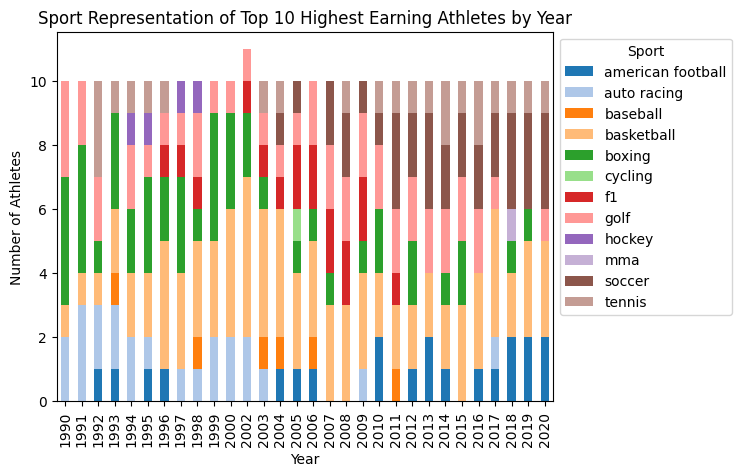

In [ ]:
# Create barplot
sport_rep_pivot1.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)
plt.title('Sport Representation of Top 10 Highest Earning Athletes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Sport', bbox_to_anchor=(1, 1)) # bbox allows us to move the legend away from the visual so they do not overlap
plt.show()

**American Football** representation seems to have increased a little bit over time and has remained consistent throughout the 2010s with no more than 2 athletes in the Top 100.
**Auto Racing** representation seems to have decreased over time and has not had much representation since 2003 with only 2 athletes in the Top 100 since.
**Baseball** representation seems to have never been very dominant with only 6 athletes in the Top 100 over time.
**Basketball** representation seems to have been consistently the highest over time.
**Boxing** representation seems to have decreased over time but remains slightly consistent over the last few years.
**Cycling** representation seems to have never been very dominant with only 1 athlete in the Top 100 over time.
**F1** representation seems to have only been slightly apparent with no more than 2 athletes in the Top 100 from 1996 to 2011.
**Golf** representation seems to have been consistently seen over time with no more than 4 athletes in the Top 100.
**Ice Hockey** representation seems to have only been slightly apparent with no more than 1 athlete in the Top 100 from 1994 to 1998.
**MMA** representation seems to have only been apparent once in 2018 with 1 athlete in the Top 100.
**Soccer** representation seems to have increased significantly with no more than 3 athletes in the Top 100 from 2004 to 2020
**Tennis** representation seems to have been consistent with no more than 3 athletes in the Top 100 over time.

Find the athletes that appear significantly more than others. Do their earnings change the representation of their sport?

In [ ]:
# Identify star athletes
star_athletes = dat['Name'].value_counts().reset_index()

In [ ]:
# Define name count
name_count = 19

In [ ]:
# 'dat' filtered to show only the names that show up less frequently
filtered_stars = star_athletes[star_athletes['count'] < name_count]
name_series = filtered_stars['Name']
star_athletes_filtered = dat[dat['Name'].isin(name_series)]

In [ ]:
# Get the number of rows for each group (year & sport) for the top 10 ranked athletes by earnings
sport_rep2 = star_athletes_filtered.value_counts(['Year', 'clean_sport']).reset_index()

In [ ]:
# Pivot the data
sport_rep_pivot2 = pd.pivot(sport_rep2, index='Year', columns='clean_sport', values='count')

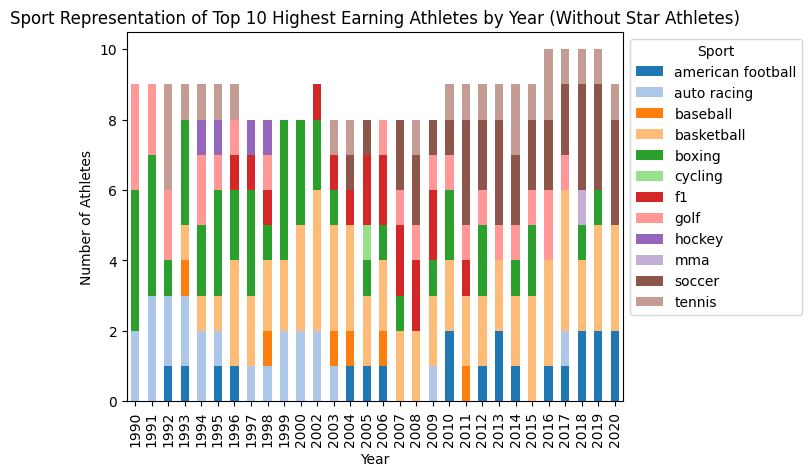

In [ ]:
# Create barplot
sport_rep_pivot2.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)
plt.title('Sport Representation of Top 10 Highest Earning Athletes by Year (Without Star Athletes)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Sport', bbox_to_anchor=(1, 1))
plt.show()

Look for dominant nationalities. How does average earnings compare across the most dominant nationalities?

In [ ]:
# Identify nationality counts
nationality_counts = dat['Nationality'].value_counts().reset_index()

In [ ]:
# Define nationality count
nationality_count = 9

In [ ]:
# 'dat' filtered to show only the nationalities that show up more frequently
filtered_nationalities = nationality_counts[nationality_counts['count'] > nationality_count]
nationality_series = filtered_nationalities['Nationality']
nlegend = dat[dat['Nationality'].isin(nationality_series)]

In [ ]:
# Calculate average earnings for year and nationality
avg_earnings_df = nlegend.groupby(['Year', 'Nationality'])['earnings ($ million)'].agg(['mean', 'sum']).reset_index()

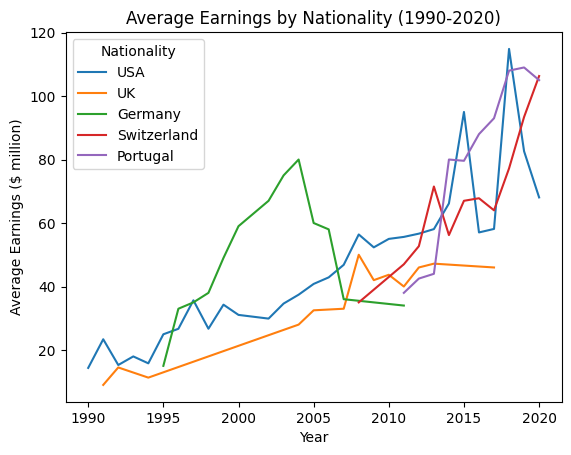

In [ ]:
# Create lineplot to show different nationality average earnings from 1990 to 2020
sns.lineplot(data=avg_earnings_df, x='Year', y='mean', hue='Nationality')
plt.title('Average Earnings by Nationality (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Average Earnings ($ million)')
plt.legend(title='Nationality', loc='upper left')
plt.show()

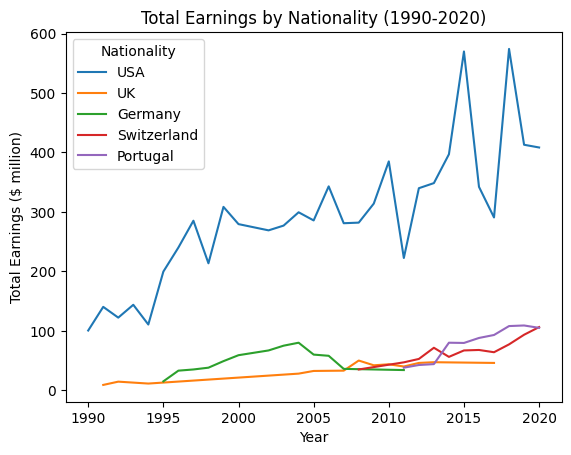

In [ ]:
# Create lineplot to show different nationality total earnings from 1990 to 2020
sns.lineplot(data=avg_earnings_df, x='Year', y='sum', hue='Nationality')
plt.title('Total Earnings by Nationality (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Total Earnings ($ million)')
plt.legend(title='Nationality', loc='upper left')
plt.show()

Make a scatterplot to find any trends among earnings between top athletes each year

In [ ]:
# How many of the top earners do we want to look at
highest_earners = 50

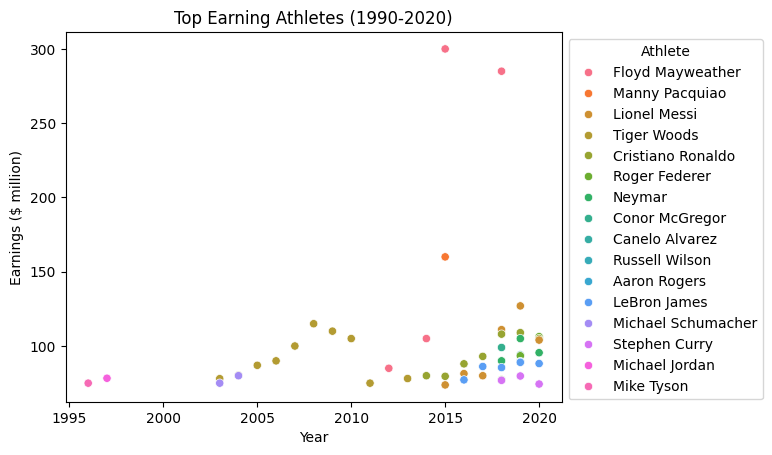

In [ ]:
# Sort the data by earnings and highest earning athletes
athlete_total_earnings = dat.groupby(['Year', 'Name'])['earnings ($ million)'].agg('sum').reset_index()
sorted_athletes = athlete_total_earnings.sort_values('earnings ($ million)', ascending = False)
top_athletes = sorted_athletes.head(highest_earners)

sns.scatterplot(data=top_athletes, x='Year', y='earnings ($ million)', hue='Name')
plt.title('Top Earning Athletes (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Earnings ($ million)')
plt.legend(title='Athlete', bbox_to_anchor=(1, 1))
plt.show()

Regress 'earnings ($ million)' on 'Current Rank', 'clean_sport' and 'Nationality'

In [ ]:
# Regress athlete earnings on current rank
X_rank = dat.loc[:, ['Current Rank']]
X_rank = sm.add_constant(X_rank)
y = dat['earnings ($ million)']
modfit = sm.OLS(y, X_rank).fit()
modfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     earnings ($ million)   R-squared:                       0.202
Model:                              OLS   Adj. R-squared:                  0.199
Method:                   Least Squares   F-statistic:                     75.52
Date:                  Mon, 09 Dec 2024   Prob (F-statistic):           2.42e-16
Time:                          23:57:40   Log-Likelihood:                -1449.9
No. Observations:                   301   AIC:                             2904.
Df Residuals:                       299   BIC:                             2911.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           74.2870      3.735     19.888      0.000      66.936      81.638
Current Rank    -5.2805      0.608     -8.690      0.000      -6.476      -4.085
==============================================================================
Omnibus:                      236.287   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5029.941
Skew:                           2.988   Prob(JB):                         0.00
Kurtosis:                      22.114   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Predict earnings ($ million) for a specific rank value
X_ranknew = pd.DataFrame({'const': [1], 'Current Rank': [1]})
modfit.predict(X_ranknew)

,0
0,69.006524


In [ ]:
# Predict earnings ($ million) for all observed rank values
X_ranknew = dat[['Current Rank']]
X_ranknew = sm.add_constant(X_ranknew)
modfit.predict(X_ranknew)

,0
0,69.006524
1,63.726043
2,58.445562
3,53.165082
4,47.884601
...,...
296,42.604120
297,37.323640
298,32.043159
299,26.762678


In [ ]:
# Modeling a polynomial relationship
dat['Current Rank 2'] = dat['Current Rank']**2
X2 = dat.loc[:, ['Current Rank', 'Current Rank 2']]
X2 = sm.add_constant(X2)
y = dat['earnings ($ million)']
modfit2 = sm.OLS(y, X2).fit()
modfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     earnings ($ million)   R-squared:                       0.260
Model:                              OLS   Adj. R-squared:                  0.255
Method:                   Least Squares   F-statistic:                     52.24
Date:                  Mon, 09 Dec 2024   Prob (F-statistic):           3.56e-20
Time:                          23:57:47   Log-Likelihood:                -1438.6
No. Observations:                   301   AIC:                             2883.
Df Residuals:                       298   BIC:                             2894.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             98.6971      6.208     15.899      0.000      86.481     110.914
Current Rank     -17.5981      2.617     -6.724      0.000     -22.749     -12.447
Current Rank 2     1.1301      0.234      4.829      0.000       0.670       1.591
==============================================================================
Omnibus:                      225.173   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4229.135
Skew:                           2.829   Prob(JB):                         0.00
Kurtosis:                      20.470   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Predicting with a polynomial
X2new = pd.DataFrame({'const': [1], 'Current Rank': [1], 'Current Rank 2': [1**2]})
modfit2.predict(X2new)

,0
0,82.22904


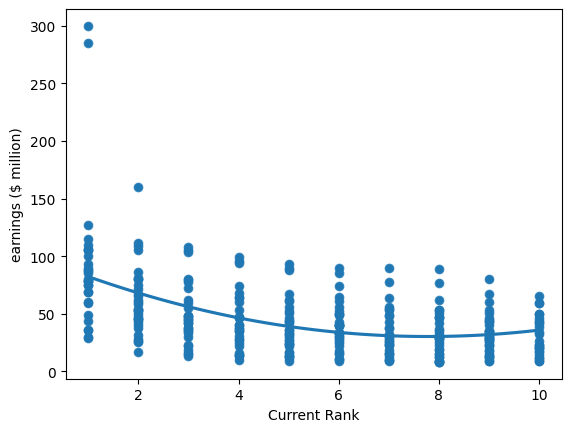

In [ ]:
# Plotting the polynomial
sns.scatterplot(data = dat, x = 'Current Rank', y = 'earnings ($ million)')
sns.regplot(data = dat, x = 'Current Rank', y = 'earnings ($ million)', order = 2, ci = None)
plt.show()

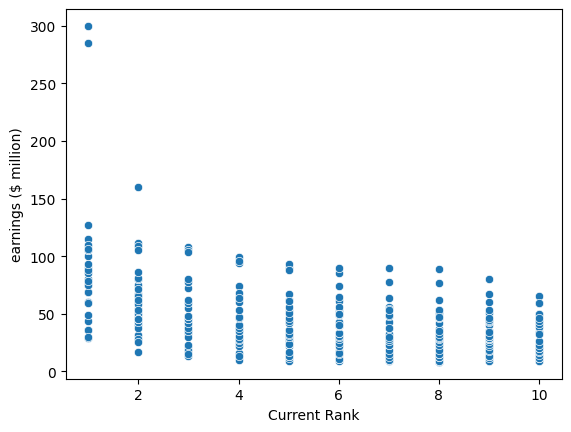

In [ ]:
# But wait, is the relationship linear?
sns.scatterplot(dat, y = 'earnings ($ million)', x = 'Current Rank')
plt.show()

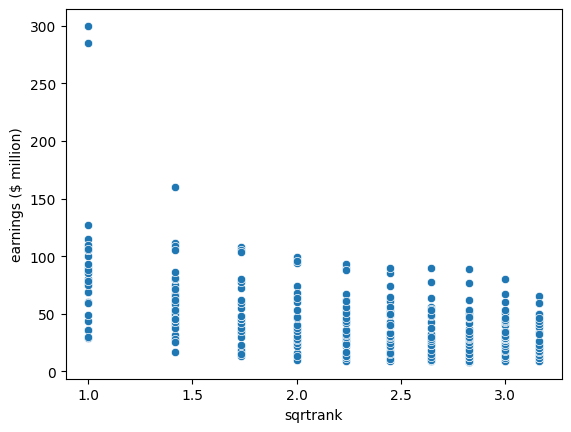

In [ ]:
# Testing for linearity 1
dat['sqrtrank'] = np.sqrt(dat['Current Rank'])
sns.scatterplot(dat, y = 'earnings ($ million)', x = 'sqrtrank')
plt.show()

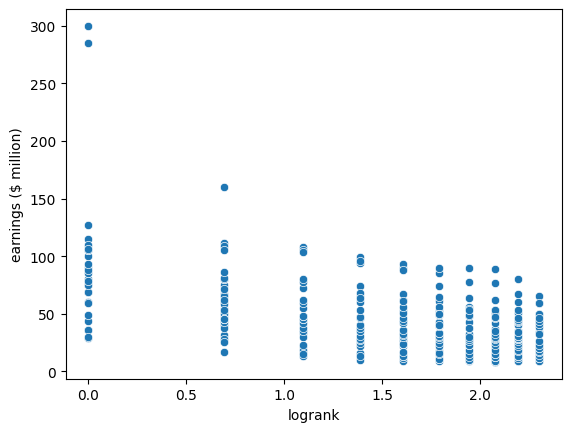

In [ ]:
# Testing for linearity 2
dat['logrank'] = np.log(dat['Current Rank'])
sns.scatterplot(dat, y = 'earnings ($ million)', x = 'logrank')
plt.show()

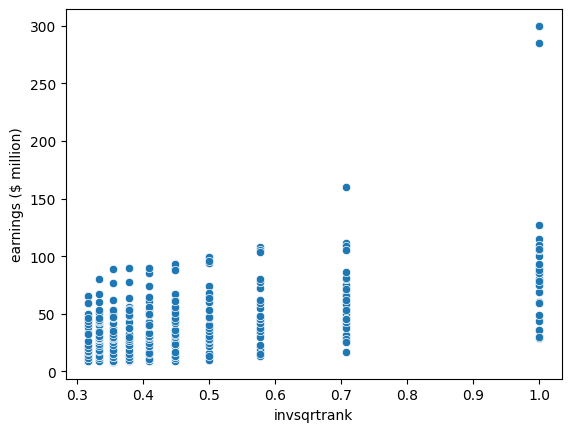

In [ ]:
#Testing for linearity 3
dat['invsqrtrank'] = 1/np.sqrt(dat['Current Rank'])
sns.scatterplot(dat, y = 'earnings ($ million)', x = 'invsqrtrank')
plt.show()

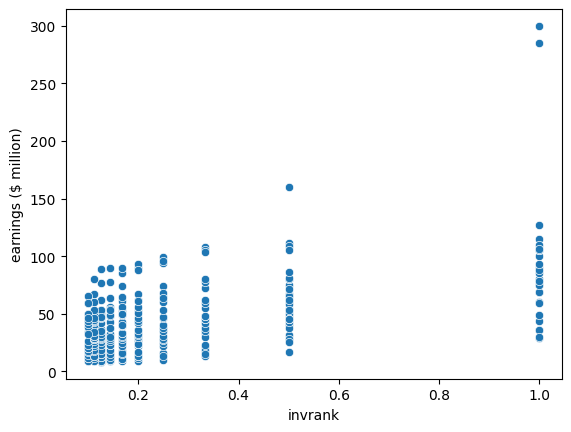

In [ ]:
# Testing for linearity 4
dat['invrank'] = 1/(dat['Current Rank'])
sns.scatterplot(dat, y = 'earnings ($ million)', x = 'invrank')
plt.show()

In [ ]:
# Regress 'earnings ($ million)' on 'Current Rank' and processed 'clean_sport' and 'Nationality'
X = pd.get_dummies(dat[['Current Rank'] + ['clean_sport', 'Nationality']], drop_first = True)
X['clean_sport_auto racing'] = X['clean_sport_auto racing']*1
X['clean_sport_baseball'] = X['clean_sport_baseball']*1
X['clean_sport_basketball'] = X['clean_sport_basketball']*1
X['clean_sport_boxing'] = X['clean_sport_boxing']*1
X['clean_sport_cycling'] = X['clean_sport_cycling']*1
X['clean_sport_f1'] = X['clean_sport_f1']*1
X['clean_sport_golf'] = X['clean_sport_golf']*1
X['clean_sport_hockey'] = X['clean_sport_hockey']*1
X['clean_sport_mma'] = X['clean_sport_mma']*1
X['clean_sport_soccer'] = X['clean_sport_soccer']*1
X['clean_sport_tennis'] = X['clean_sport_tennis']*1
X['Nationality_Australia'] = X['Nationality_Australia']*1
X['Nationality_Austria'] = X['Nationality_Austria']*1
X['Nationality_Brazil'] = X['Nationality_Brazil']*1
X['Nationality_Canada'] = X['Nationality_Canada']*1
X['Nationality_Dominican'] = X['Nationality_Dominican']*1
X['Nationality_Filipino'] = X['Nationality_Filipino']*1
X['Nationality_Finland'] = X['Nationality_Finland']*1
X['Nationality_France'] = X['Nationality_France']*1
X['Nationality_Germany'] = X['Nationality_Germany']*1
X['Nationality_Ireland'] = X['Nationality_Ireland']*1
X['Nationality_Italy'] = X['Nationality_Italy']*1
X['Nationality_Mexico'] = X['Nationality_Mexico']*1
X['Nationality_Northern Ireland'] = X['Nationality_Northern Ireland']*1
X['Nationality_Philippines'] = X['Nationality_Philippines']*1
X['Nationality_Portugal'] = X['Nationality_Portugal']*1
X['Nationality_Russia'] = X['Nationality_Russia']*1
X['Nationality_Serbia'] = X['Nationality_Serbia']*1
X['Nationality_Spain'] = X['Nationality_Spain']*1
X['Nationality_Switzerland'] = X['Nationality_Switzerland']*1
X['Nationality_UK'] = X['Nationality_UK']*1
X['Nationality_USA'] = X['Nationality_USA']*1
X = sm.add_constant(X)
y = dat['earnings ($ million)']
modfit = sm.OLS(y, X).fit()
modfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     earnings ($ million)   R-squared:                       0.343
Model:                              OLS   Adj. R-squared:                  0.264
Method:                   Least Squares   F-statistic:                     4.368
Date:                  Mon, 09 Dec 2024   Prob (F-statistic):           7.36e-12
Time:                          23:58:14   Log-Likelihood:                -1420.6
No. Observations:                   301   AIC:                             2907.
Df Residuals:                       268   BIC:                             3030.
Df Model:                            32                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           81.5148     20.707      3.936      0.000      40.745     122.285
Current Rank                    -4.9590      0.676     -7.334      0.000      -6.290      -3.628
clean_sport_auto racing        -15.1537     12.796     -1.184      0.237     -40.347      10.040
clean_sport_baseball           -17.5062     14.333     -1.221      0.223     -45.726      10.714
clean_sport_basketball         -12.8667      7.138     -1.802      0.073     -26.921       1.188
clean_sport_boxing             -15.6998      8.058     -1.948      0.052     -31.564       0.164
clean_sport_cycling             -9.7426     29.453     -0.331      0.741     -67.732      48.246
clean_sport_f1                  -6.3720     22.846     -0.279      0.781     -51.353      38.609
clean_sport_golf                -9.2831      7.887     -1.177      0.240     -24.811       6.245
clean_sport_hockey             -22.7280     25.505     -0.891      0.374     -72.943      27.487
clean_sport_mma                 18.6606     17.664      1.056      0.292     -16.117      53.439
clean_sport_soccer              19.4742     18.147      1.073      0.284     -16.255      55.203
clean_sport_tennis             -27.0506     11.467     -2.359      0.019     -49.628      -4.473
Nationality_Australia          -29.0188     35.247     -0.823      0.411     -98.416      40.378
Nationality_Austria            -28.0662     32.932     -0.852      0.395     -92.905      36.773
Nationality_Brazil             -14.4660     14.716     -0.983      0.326     -43.440      14.508
Nationality_Canada              -3.8148     23.740     -0.161      0.872     -50.556      42.926
Nationality_Dominican           10.6633     37.113      0.287      0.774     -62.408      83.734
Nationality_Filipino             6.1029     35.011      0.174      0.862     -62.828      75.034
Nationality_Finland            -13.9599     29.861     -0.467      0.641     -72.751      44.832
Nationality_France             -29.5662     23.092     -1.280      0.202     -75.032      15.899
Nationality_Germany             -7.1782     23.100     -0.311      0.756     -52.658      38.301
Nationality_Ireland             18.6606     17.664      1.056      0.292     -16.117      53.439
Nationality_Italy                0.2484     28.843      0.009      0.993     -56.539      57.035
Nationality_Mexico              48.0209     35.070      1.369      0.172     -21.027     117.069
Nationality_Northern Ireland     7.5222     35.182      0.214      0.831     -61.746      76.791
Nationality_Philippines         41.2996     26.143      1.580      0.115     -10.172      92.771
Nationality_Portugal            -2.9389     13.216     -0.222      0.824     -28.959      23.081
Nationality_Russia             -14.1098     40.639    

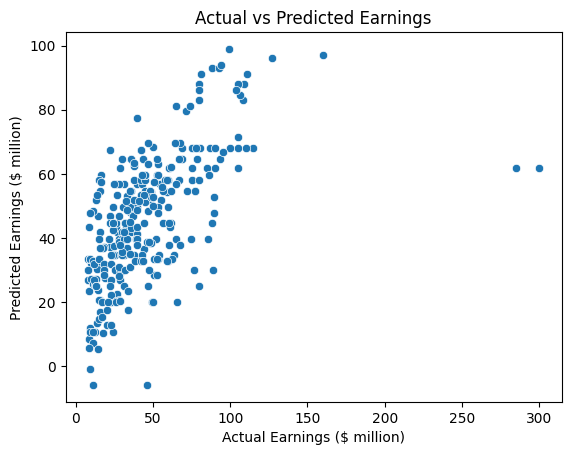

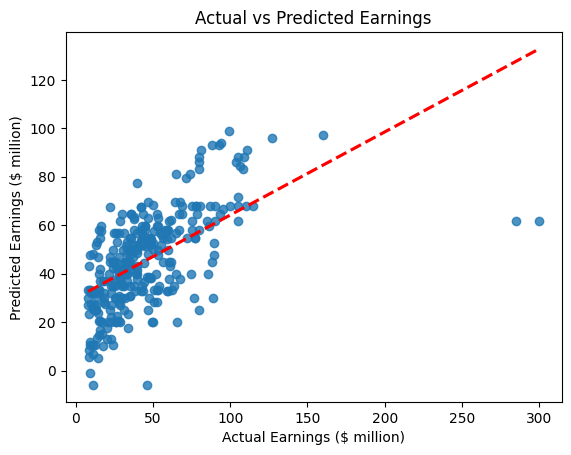

In [ ]:
y_pred = modfit.predict(X)

sns.scatterplot(x = y, y = y_pred)
plt.xlabel('Actual Earnings ($ million)')
plt.ylabel('Predicted Earnings ($ million)')
plt.title('Actual vs Predicted Earnings')
plt.show()

sns.regplot(dat, x = y, y = y_pred, ci = None, line_kws={'linestyle':'dashed', 'color':'red'})
plt.xlabel('Actual Earnings ($ million)')
plt.ylabel('Predicted Earnings ($ million)')
plt.title('Actual vs Predicted Earnings')
plt.show()